In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore') #ignore warning to imporve readability
#from statsmodels import runstest_1samp
from statsmodels.sandbox.stats.runs import runstest_1samp 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier #for classification
from sklearn.tree import DecisionTreeRegressor #for regression
from sklearn.ensemble import RandomForestClassifier #for classification
from sklearn.ensemble import RandomForestRegressor #for regression
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression
from sklearn.svm import SVC
from sklearn.decomposition import PCA


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
#from statsmodels.sandbox.stats.runs import runstest_1samp

from sklearn.model_selection import GridSearchCV

from scipy.stats import pearsonr,spearmanr

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split,cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
#display all columns in dataframe
pd.pandas.set_option('display.max_columns',None)

In [4]:
os.chdir("D:\\Data Science\\Machine Leaning\\Assessment\\KNN + SVM + Naive Bayes + PCA")
os.getcwd()

'D:\\Data Science\\Machine Leaning\\Assessment\\KNN + SVM + Naive Bayes + PCA'

In [5]:
df=pd.read_csv("Wine.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


#### Basic Information of the data:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [8]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [9]:
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])
print("Shape of dataset:",df.shape)

Number of rows: 178
Number of columns: 14
Shape of dataset: (178, 14)


In [10]:
#check for Datatypes. Object Types could contain poorly formatted information
df.dtypes.value_counts()

float64    11
int64       3
dtype: int64

#### Finding missing values:

In [11]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

#### Finding if dataset is balanced or imbalanced:

In [12]:
df['Customer_Segment'].value_counts(normalize=True)

2    0.398876
1    0.331461
3    0.269663
Name: Customer_Segment, dtype: float64

The condition for balanced data is the minority class of the dataset should have more than 25% of data. Since minority class here has 26.96% of data, it is balanced.

In [13]:
df1=df.copy()
df1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


#### Splitting data to categorical and numerical:

In [14]:
#numerical features in the dataset 

# list of numerical variables
numerical_features = [feature for feature in df.columns if feature!= 'Customer_Segment']
print('Number of numerical variables:', len(numerical_features))

print(df[numerical_features].columns)

# visualise the numerical variables
print("Numerical features are:")
df[numerical_features].head()

Number of numerical variables: 13
Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')
Numerical features are:


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Type-casting target variable:

In [15]:
df1['Customer_Segment']=df1['Customer_Segment'].astype('category')

## Question 1: Compute and plot those feature which are related to each other?

#### Analysis on data:

#### 1. Vizualize the percentage of each customer segment.

In [16]:
df1['Customer_Segment'].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

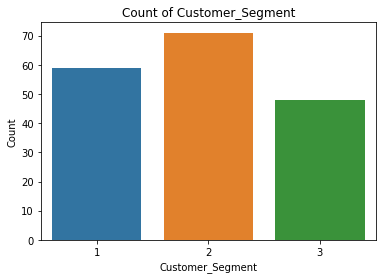

In [17]:
sns.countplot(x=df1['Customer_Segment'],data=df1)
plt.ylabel("Count")
plt.xlabel("Customer_Segment")
plt.title('Count of Customer_Segment')
plt.show()

The count of Customer Segment 2 is the most, whereas the count of Customer Segment 3 is the least.

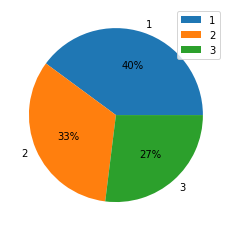

In [18]:
plt.pie(x=df1['Customer_Segment'].value_counts(), labels = df1['Customer_Segment'].unique(),data=df1,autopct='%.0f%%')
plt.legend()
plt.show()

#### 2. What is the percentage of alcohol in each customer segment?

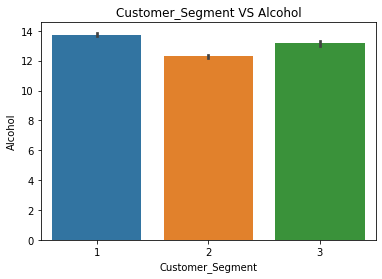

In [19]:
sns.barplot(x=df1['Customer_Segment'],y=df1['Alcohol'],data=df1)
plt.xlabel('Customer_Segment')
plt.ylabel('Alcohol')
plt.title('Customer_Segment VS Alcohol')
plt.show()

From the graph it is evident that Customer_Segment 1 prefers more alcohol content and Customer Segment 2 prefers least alcohol content, although the alcohol content is more or less in the same level for all the 3 segments.

#### 3. Visualize the distribution of each feature. 

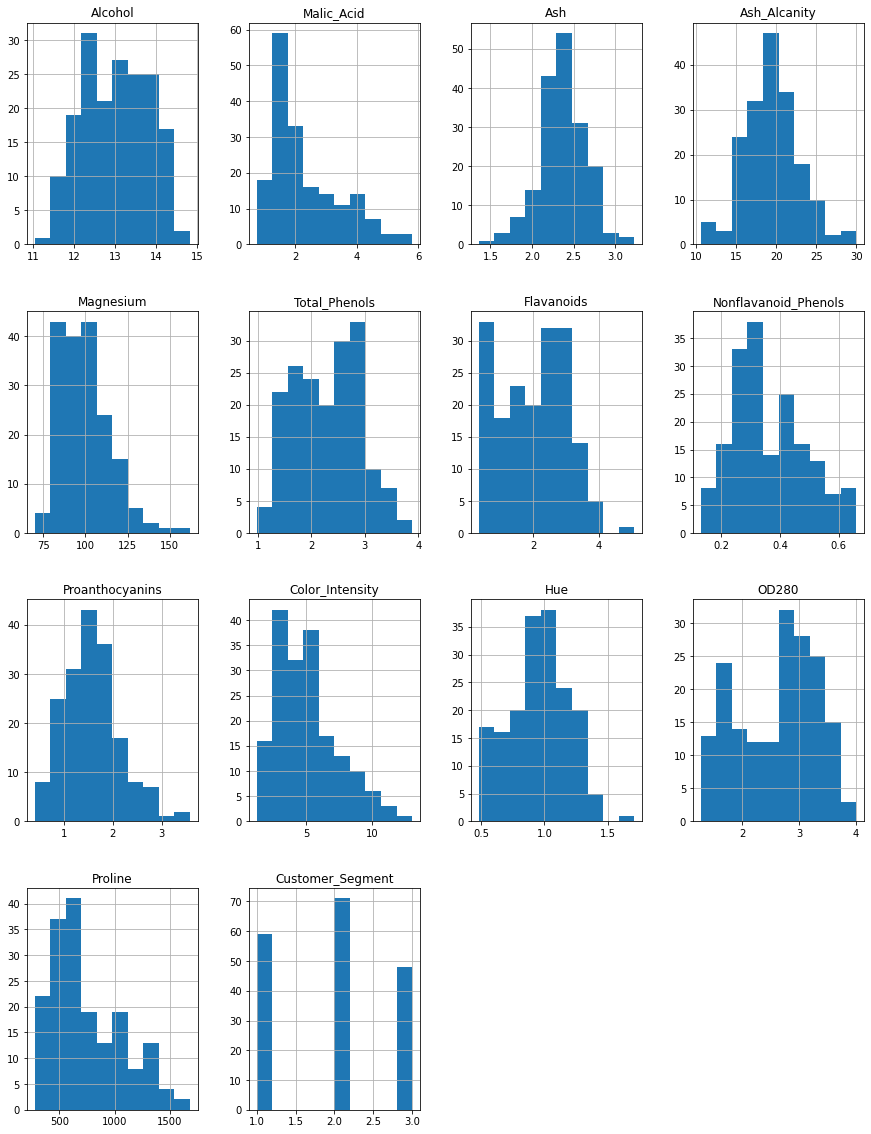

In [20]:
#check on the distribution
fig, ax = plt.subplots(figsize = (15,20))
df.hist(figsize = (15,20), ax = ax)
plt.show()

#### 4. Finding if the numerical data have any outliers:

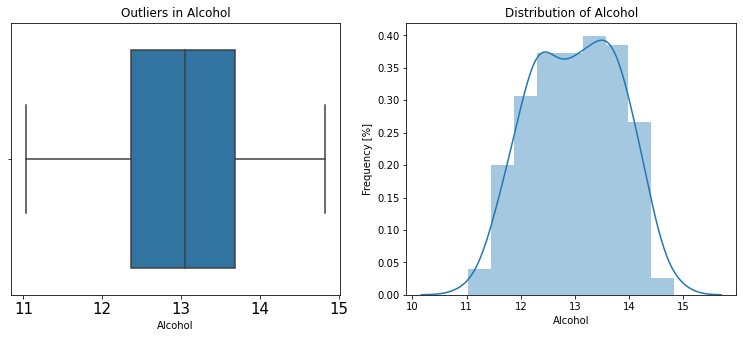

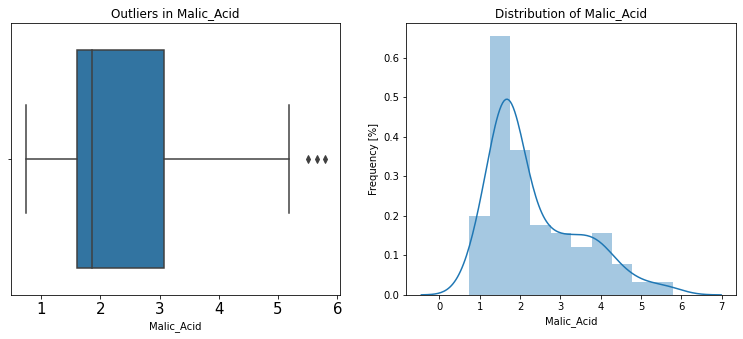

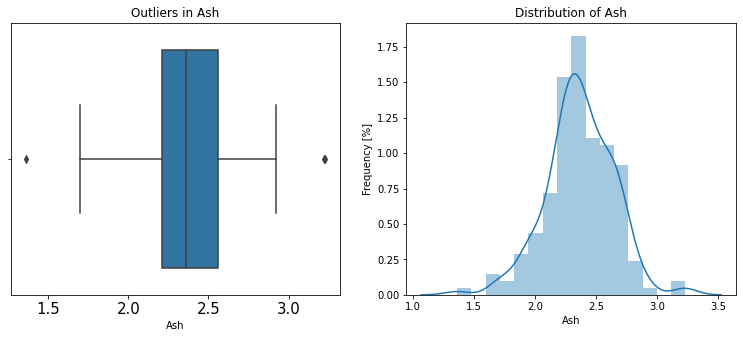

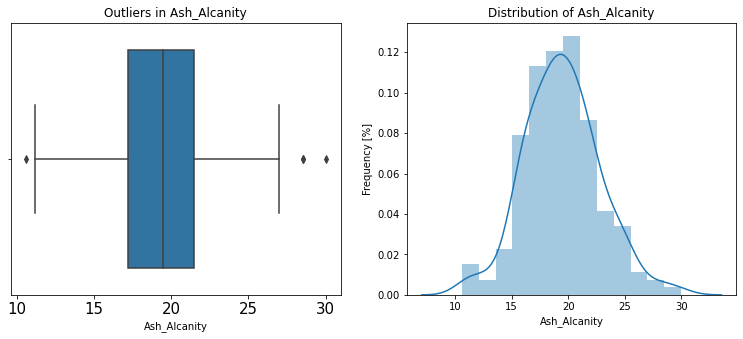

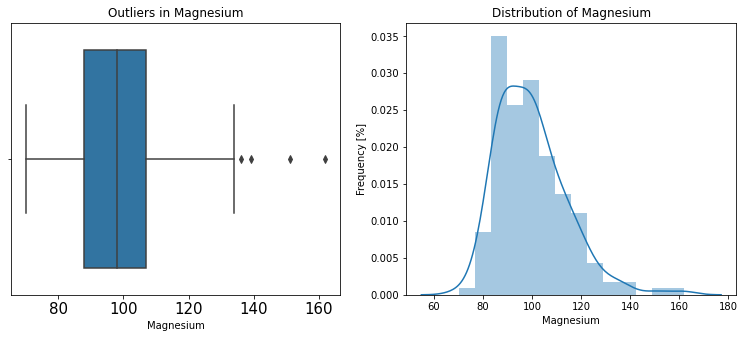

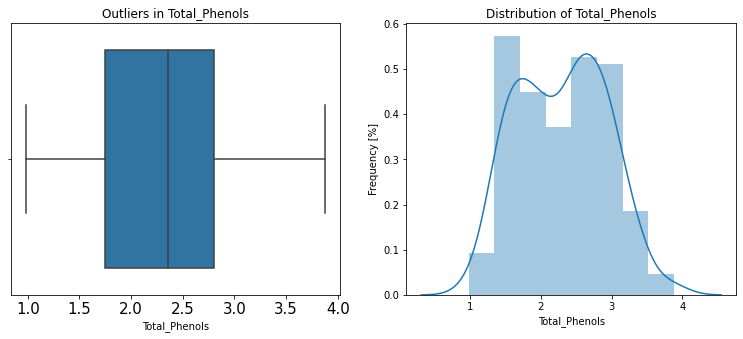

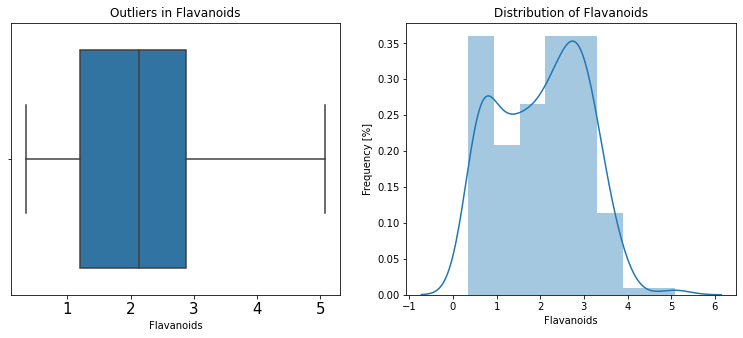

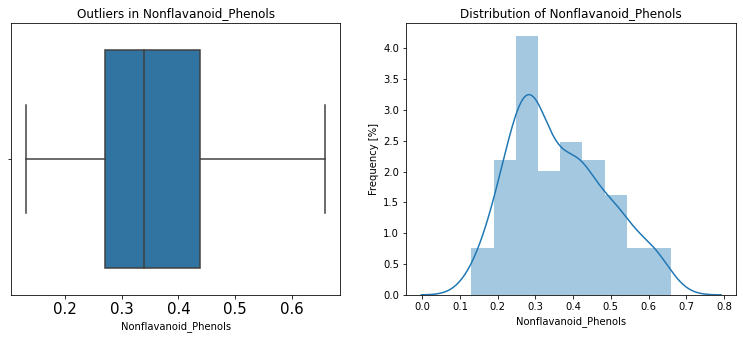

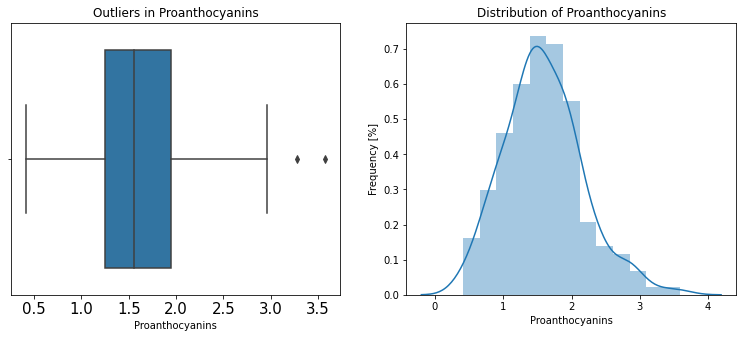

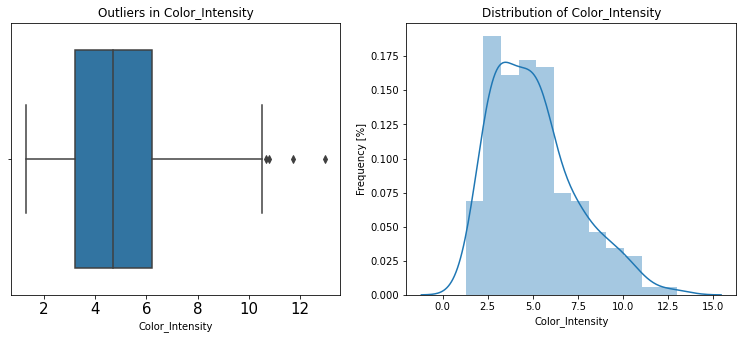

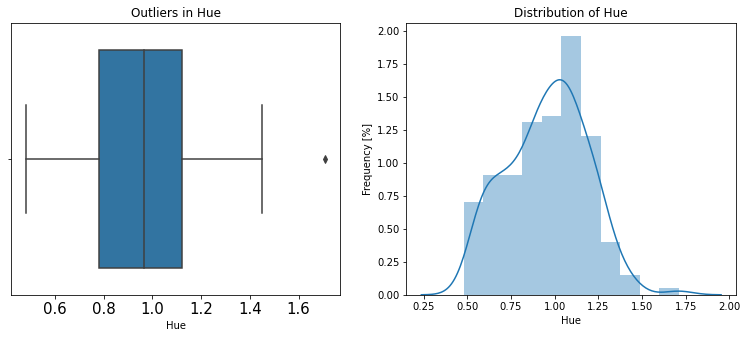

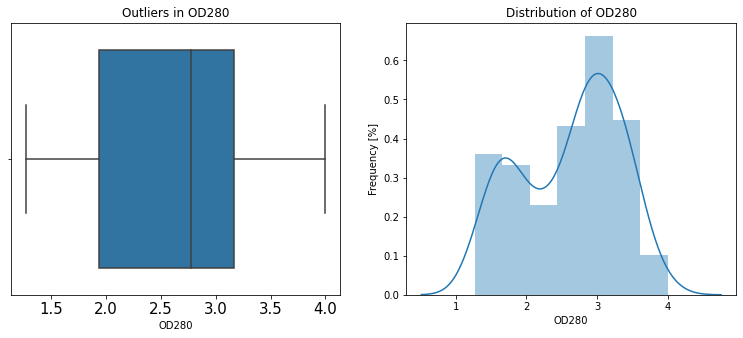

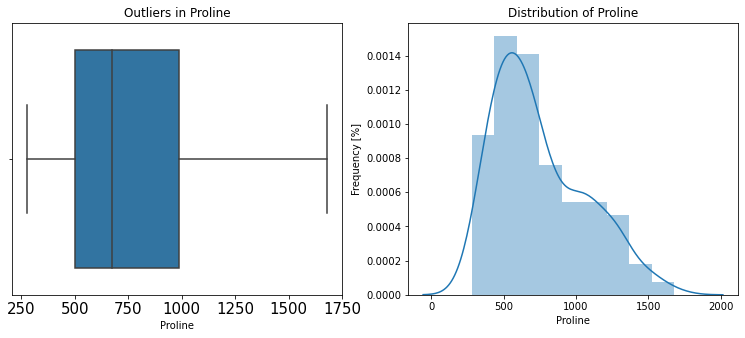

In [21]:
for feature in df1.columns:
    if feature != 'Customer_Segment':
        fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
        sns.boxplot(x=df1[feature],data=df1,ax=ax1)
        ax1.set_title('Outliers in {}'.format(feature))
        ax1.tick_params(labelsize=15)
        
        sns.distplot(df1[feature], ax = ax2)
        ax2.set_xlabel(feature)
        ax2.set_ylabel("Frequency [%]")
        ax2.set_title('Distribution of {}'.format(feature))

Some of the numerical features have outliers.

#### 5. How does Ash and Ash Alcanity vary with each other?

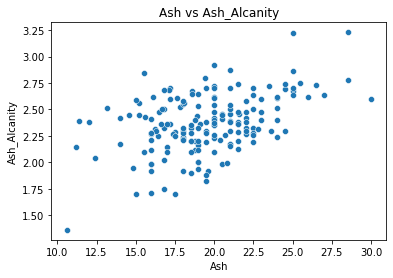

In [22]:
sns.scatterplot(y="Ash",x="Ash_Alcanity",data=df1);
plt.xlabel("Ash")
plt.ylabel("Ash_Alcanity")
plt.title("Ash vs Ash_Alcanity")
plt.show()

#### 6. How does number of Magnesium vary with Alcohol?

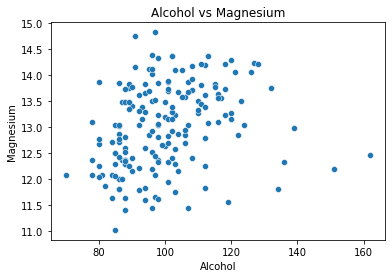

In [23]:
sns.scatterplot(y="Alcohol",x="Magnesium",data=df1);
plt.xlabel("Alcohol")
plt.ylabel("Magnesium")
plt.title("Alcohol vs Magnesium")
plt.show()

#### 7. How does the Colour Intensity vary for each Customer Segment?

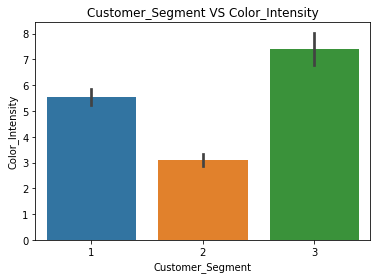

In [24]:
sns.barplot(x=df1['Customer_Segment'],y=df1['Color_Intensity'],data=df1)
plt.xlabel('Customer_Segment')
plt.ylabel('Color_Intensity')
plt.title('Customer_Segment VS Color_Intensity')
plt.show()

The colour intensity is more for segment 3 and least for segment 2.

#### 8. What is the relationship between Flavanoids and Color Intensity?

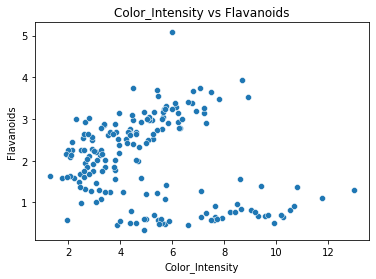

In [25]:
sns.scatterplot(y="Flavanoids",x="Color_Intensity",data=df1);
plt.xlabel("Color_Intensity")
plt.ylabel("Flavanoids")
plt.title("Color_Intensity vs Flavanoids")
plt.show()

#### 9. How Total Phenols and Non Flavanoid Phenols vary with each other?

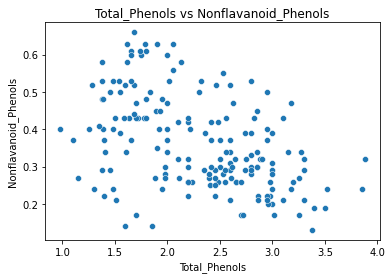

In [26]:
sns.scatterplot(y="Nonflavanoid_Phenols",x="Total_Phenols",data=df1);
plt.xlabel("Total_Phenols")
plt.ylabel("Nonflavanoid_Phenols")
plt.title("Total_Phenols vs Nonflavanoid_Phenols")
plt.show()

#### 10. What is the Malic_Acid for wach Customer_Segment?

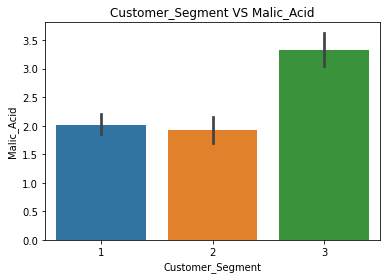

In [27]:
sns.barplot(x=df1['Customer_Segment'],y=df1['Malic_Acid'],data=df1)
plt.xlabel('Customer_Segment')
plt.ylabel('Malic_Acid')
plt.title('Customer_Segment VS Malic_Acid')
plt.show()

Malic acid is more for segment 3 and least for segment 2. Segment 1 and 2 have almost same level of malic acid content.

### Model Building:

In [28]:
df2=df1.copy()
df2.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


#### Prevalence Rate: 
It is used to find if the data set is balanced or not. The condition for balanced data is the minority class of the dataset should have more than 25% of data. Example: 60-40,70-30. In this the minority class is having 40 and 30 percent of data respectively. So such dataset are balanced.

We can use this to find the metrics that we will adopt for the model.

If the actual value is 0 and model is predicting 1, it is called 'False-Positive(FP)'.
If the actual value is 1 and model is predicting 0, it is called 'False-Negative(FN)'.
If the actual value is 0 and model is predicting 0, it is called 'True-Negative(TN)'.
If the actual value is 1 and model is predicting 1, it is called 'True-Positive(TP)'.
If the dataset is balanced the metrics we use is Accuracy. Else depending on 'False-Positive(FP)' and 'False-Negative(FN)' and their misclassification we can go for Precision, Recall or F1-Score.

If concentration is more on FP -> Metrics = Precision.

If concentration is more on FN -> Metrics = Recall.

If concentration is more on both FN and FP -> Metrics = F1-Score. [Misclassification]

If concentration is more on both TN and TP -> Metrics = Accuracy. [Correct Classification]

In [29]:
#Prevalence rate of the dataset
df2['Customer_Segment'].value_counts(normalize=True)

2    0.398876
1    0.331461
3    0.269663
Name: Customer_Segment, dtype: float64

The dataset is balanced since minority class has more than 25% of the data.

In [30]:
train_acc=[]
test_acc=[]

#### Encoding of data:


In [31]:
df3=df2.copy()
df3['Customer_Segment'].replace({1:1},inplace=True)
df3['Customer_Segment'].replace({2:0},inplace=True)
df3['Customer_Segment'].replace({3:2},inplace=True)
df3.head(75)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.040,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.050,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.030,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.860,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.040,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,12.29,1.61,2.21,20.4,103,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870,0
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.360,3.16,410,0
72,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.980,2.78,472,0
73,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.310,3.50,985,0


#### Splitting the data into dependent(y) and independent(x):

In [32]:
x=df2.drop('Customer_Segment',axis=1)
y=df2.iloc[:,-1]

In [33]:
x.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [34]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Customer_Segment, dtype: category
Categories (3, int64): [1, 2, 3]

#### Splitting the data to train and test:

In [35]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [36]:
print("Shape of train data:")
print("\nShape of X train:",xtrain.shape)
print("Shape of Y train:",ytrain.shape)
print("\nShape of test data:")
print("\nShape of X test:",xtest.shape)
print("Shape of Y test:",ytest.shape)

Shape of train data:

Shape of X train: (142, 13)
Shape of Y train: (142,)

Shape of test data:

Shape of X test: (36, 13)
Shape of Y test: (36,)


#### Performing MinMaxScaling on the data:

In [37]:
scaler=MinMaxScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [38]:
xtrain

array([[0.59210526, 0.17786561, 0.79569892, ..., 0.49593496, 0.56981132,
        0.48666128],
       [0.71052632, 0.15019763, 0.72043011, ..., 0.57723577, 0.54339623,
        0.81406629],
       [0.62105263, 0.20355731, 0.67741935, ..., 0.35772358, 0.73584906,
        0.74130962],
       ...,
       [0.65263158, 0.20948617, 0.69354839, ..., 0.50406504, 0.60377358,
        0.66046888],
       [0.50789474, 0.53557312, 0.53225806, ..., 0.16260163, 0.18113208,
        0.32093775],
       [0.48684211, 0.44466403, 0.55913978, ..., 0.21138211, 0.05660377,
        0.20371867]])

In [39]:
xtest

array([[ 0.80789474,  0.28063241,  0.50537634,  0.3814433 ,  0.38043478,
         0.67931034,  0.87647059,  0.18      ,  0.62025316,  0.38139932,
         0.62601626,  0.71698113,  0.99595796],
       [ 0.38947368,  0.09881423,  0.47849462,  0.3556701 ,  0.16304348,
         0.35172414,  0.07058824,  0.94      ,  0.26265823,  0.35580205,
         0.2195122 ,  0.09056604,  0.30072757],
       [ 0.74736842,  0.22924901,  0.77419355,  0.45360825,  0.40217391,
         0.67931034,  0.77352941,  0.48      ,  0.42405063,  0.27474403,
         0.62601626,  0.80377358,  0.51495554],
       [ 0.13947368,  0.25889328,  1.00537634,  0.92268041,  0.5326087 ,
         0.75862069,  1.39411765,  0.68      ,  0.45886076,  0.40273038,
         0.36585366,  0.91320755,  0.15117219],
       [ 0.69473684,  0.10079051,  0.30107527,  0.3814433 ,  0.26086957,
         0.3862069 ,  0.42647059,  0.38      ,  0.09810127,  0.21501706,
         0.6097561 ,  0.4490566 ,  0.28455942],
       [ 0.73684211,  0.179841

#### LOGISTIC REGRESSION:

#### Multi collinearity check using Variance Inflation Factor(VIF):

In [40]:
df3.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [41]:
vif = pd.DataFrame()
vif['feature'] = numerical_features
vif['VIF'] = [variance_inflation_factor(df2.iloc[:,0:-1].values,i) for i in range(len(df1.iloc[:,0:-1].columns))]

In [42]:
vif

,feature,VIF
0,Alcohol,206.189057
1,Malic_Acid,8.925541
2,Ash,165.640370
3,Ash_Alcanity,73.141564
4,Magnesium,67.364868
5,Total_Phenols,62.786935
6,Flavanoids,35.535602
7,Nonflavanoid_Phenols,16.636708
8,Proanthocyanins,17.115665
9,Color_Intensity,17.022272


Alcohol is most affected by other features whereas Malic_Acid is least affected by other features.

In [43]:
lom=LogisticRegression(random_state=42)
lom.fit(xtrain,ytrain)

LogisticRegression(random_state=42)

In [44]:
print("Intercept value:",lom.intercept_)
print("\nCo-efficients value:\n",lom.coef_)

Intercept value: [-3.19526576  2.69958053  0.49568523]

Co-efficients value:
 [[ 1.44414339e+00  4.83873964e-02  6.11902308e-01 -1.14199587e+00
   2.51546457e-01  7.79465799e-01  1.59549641e+00 -4.17187401e-01
   1.12710049e-01  3.90746561e-01  2.97469577e-01  1.23261681e+00
   2.03801352e+00]
 [-1.86389714e+00 -1.00772417e+00 -1.09387172e+00  5.70920096e-01
  -3.98469818e-01 -4.74255245e-02  2.48429719e-01  1.87506152e-03
   5.37691240e-01 -1.85029430e+00  9.30926327e-01  3.47010239e-01
  -1.90709526e+00]
 [ 4.19753755e-01  9.59336771e-01  4.81969410e-01  5.71075772e-01
   1.46923361e-01 -7.32040275e-01 -1.84392613e+00  4.15312339e-01
  -6.50401289e-01  1.45954774e+00 -1.22839590e+00 -1.57962704e+00
  -1.30918260e-01]]


In [45]:
#predicting ytrain and ytest value using xtrain and xtest
train_pred_lr=lom.predict(xtrain)
test_pred_lr=lom.predict(xtest)
print("Y Train predicted:\n",train_pred_lr)
print("\nY Test predicted:\n",test_pred_lr)

Y Train predicted:
 [1 1 1 1 3 3 2 3 1 1 2 2 1 1 3 2 2 2 1 1 2 3 1 3 3 1 1 2 2 1 1 1 1 1 2 3 1
 2 1 2 1 2 3 2 2 2 1 1 3 1 1 3 2 2 3 2 2 2 2 1 2 2 1 1 1 1 1 2 2 2 3 3 1 1
 3 2 2 2 2 3 1 3 1 3 2 3 3 2 1 1 2 2 2 1 1 1 3 2 2 2 3 2 1 2 1 2 3 1 1 2 3
 3 2 2 2 3 3 3 3 2 2 3 2 3 3 1 1 3 1 2 3 3 2 3 2 2 2 3 2 1 3 3]

Y Test predicted:
 [1 3 1 2 2 1 1 2 2 3 2 3 1 3 1 2 2 1 2 1 2 2 1 1 2 2 1 3 2 3 1 3 2 3 3 3]


#### Checking for ACCURACY, CONFUSION MATRIX and CLASSIFICATION REPORT of test and train data:

In [46]:
print("\t\t\t\t\t*****ACCURACY*****\n")
lr_train_acc=accuracy_score(ytrain,train_pred_lr)
lr_test_acc=accuracy_score(ytest,test_pred_lr)
print("Training accuracy:",accuracy_score(ytrain,train_pred_lr))
print("Testing accuracy:",accuracy_score(ytest,test_pred_lr))
print('_'*100)

print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
print("Confustion matrix of train data:\n",confusion_matrix(ytrain,train_pred_lr))
print("\nConfustion matrix of test data:\n",confusion_matrix(ytest,test_pred_lr))
print('_'*100)

print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
print("Classification Report of train data:\n\n",classification_report(ytrain,train_pred_lr))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(ytest,test_pred_lr))
print('_'*100)

					*****ACCURACY*****

Training accuracy: 0.9859154929577465
Testing accuracy: 1.0
____________________________________________________________________________________________________

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[47  0  0]
 [ 1 55  1]
 [ 0  0 38]]

Confustion matrix of test data:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
____________________________________________________________________________________________________

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-score   support

           1       0.98      1.00      0.99        47
           2       1.00      0.96      0.98        57
           3       0.97      1.00      0.99        38

    accuracy                           0.99       142
   macro avg       0.98      0.99      0.99       142
weighted avg       0.99      0.99      0.99       142

---------------------------------------------------------------------------
Clas

There is no overfitting problem and model is showing 98% train and 100% test accuracy.

In [47]:
train_acc.append(lr_train_acc)
test_acc.append(lr_test_acc)

#### DECISION TREE:

In [48]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(xtrain,ytrain)

In [49]:
train_pred_dt=dt.predict(xtrain)
test_pred_dt=dt.predict(xtest)
print("Y Train predicted:\n",train_pred_dt)
print("\nY Test predicted:\n",test_pred_dt)

Y Train predicted:
 [1 1 1 1 3 3 2 3 1 1 2 2 1 1 3 2 2 2 1 1 2 3 1 3 3 1 1 2 2 1 1 1 1 1 2 3 1
 2 1 2 2 2 2 2 2 2 1 1 3 1 1 3 2 2 3 2 2 2 2 1 2 2 1 1 1 1 1 2 2 2 3 3 1 1
 3 2 2 2 2 3 1 3 1 3 2 3 3 2 1 1 2 2 2 1 1 1 3 2 2 2 3 2 1 2 1 2 3 1 1 2 3
 3 2 2 2 3 3 3 3 2 2 3 2 3 3 1 1 3 1 2 3 3 2 3 2 2 2 3 2 1 3 3]

Y Test predicted:
 [1 2 1 2 2 1 1 2 2 3 2 3 1 3 1 2 2 1 2 2 2 2 1 1 2 2 1 3 2 3 1 3 2 3 3 3]


#### Checking for ACCURACY, CONFUSION MATRIX and CLASSIFICATION REPORT of test and train data:

In [50]:
print("\t\t\t\t*****ACCURACY*****\n")
print("Training accuracy:",accuracy_score(ytrain,train_pred_dt))
print("Testing accuracy:",accuracy_score(ytest,test_pred_dt))
print('_'*100)

print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
print("Confustion matrix of train data:\n",confusion_matrix(ytrain,train_pred_dt))
print("\nConfustion matrix of test data:\n",confusion_matrix(ytest,test_pred_dt))
print('_'*100)

print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
print("Classification Report of train data:\n\n",classification_report(ytrain,train_pred_dt))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(ytest,test_pred_dt))
print('_'*100)

				*****ACCURACY*****

Training accuracy: 1.0
Testing accuracy: 0.9444444444444444
____________________________________________________________________________________________________

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]

Confustion matrix of test data:
 [[11  1  0]
 [ 0 14  0]
 [ 0  1  9]]
____________________________________________________________________________________________________

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142

---------------------------------------------------------------------------
Class

The model is giving 100% accuracy in training. Let us do hyperparamter tuning to overcome this.

In [51]:
dt1 = DecisionTreeClassifier(min_samples_split=6,max_depth=2,ccp_alpha=0.05,random_state=42)
dt1 = dt1.fit(xtrain,ytrain)

In [52]:
train_pred_dt1=dt1.predict(xtrain)
test_pred_dt1=dt1.predict(xtest)
print("Y Train predicted:\n",train_pred_dt1)
print("\nY Test predicted:\n",test_pred_dt1)

Y Train predicted:
 [1 1 1 1 3 3 2 3 1 1 2 2 1 1 3 2 2 2 2 1 1 3 1 3 3 1 1 2 2 1 1 1 1 1 1 3 2
 1 1 2 2 2 1 2 1 2 1 1 3 1 1 3 1 2 3 2 2 2 2 1 2 2 1 1 1 1 1 2 2 2 3 3 1 1
 3 2 2 2 2 3 1 3 1 3 2 3 3 2 1 1 2 1 2 1 1 1 3 2 2 3 3 2 1 2 1 2 3 1 1 2 3
 3 2 2 2 3 3 3 3 2 2 3 2 3 3 1 1 3 1 2 3 3 2 3 2 2 2 3 2 1 3 3]

Y Test predicted:
 [1 3 1 1 2 1 1 1 2 3 2 3 1 3 1 2 2 1 2 2 2 2 2 1 1 2 1 3 2 3 1 3 2 3 3 3]


#### Checking for ACCURACY, CONFUSION MATRIX and CLASSIFICATION REPORT of test and train data:

In [53]:
print("\t\t\t\t*****ACCURACY*****\n")
dt1_train_acc=accuracy_score(ytrain,train_pred_dt1)
dt1_test_acc=accuracy_score(ytest,test_pred_dt1)
print("Training accuracy:",accuracy_score(ytrain,train_pred_dt1))
print("Testing accuracy:",accuracy_score(ytest,test_pred_dt1))
print('_'*100)

print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
print("Confustion matrix of train data:\n",confusion_matrix(ytrain,train_pred_dt1))
print("\nConfustion matrix of test data:\n",confusion_matrix(ytest,test_pred_dt1))
print('_'*100)

print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
print("Classification Report of train data:\n\n",classification_report(ytrain,train_pred_dt1))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(ytest,test_pred_dt1))
print('_'*100)

				*****ACCURACY*****

Training accuracy: 0.9295774647887324
Testing accuracy: 0.8611111111111112
____________________________________________________________________________________________________

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[45  2  0]
 [ 7 49  1]
 [ 0  0 38]]

Confustion matrix of test data:
 [[10  2  0]
 [ 3 11  0]
 [ 0  0 10]]
____________________________________________________________________________________________________

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-score   support

           1       0.87      0.96      0.91        47
           2       0.96      0.86      0.91        57
           3       0.97      1.00      0.99        38

    accuracy                           0.93       142
   macro avg       0.93      0.94      0.93       142
weighted avg       0.93      0.93      0.93       142

------------------------------------------------------------------

We can clearly see that after tuning the model we have overcome the problem and model has an accuracy of 92% for training and 86% for test.

In [54]:
train_acc.append(dt1_train_acc)
test_acc.append(dt1_test_acc)

#### RANDOM FOREST:

In [55]:
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=42)

In [56]:
#pd.DataFrame(rf.feature_importances_,index=xtrain.columns).plot.bar();

As I have done MinMaxScaling this is not working, let me try and do it on train and test which hasn't been scaled to find important features alone.

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=28,stratify=y)

#### NOTEEEEE: I am testing and training the model again because it was not accepting xtrain and ytrain values after scaling. So to check for feature importance we need to give the model X_train and Y_train which hasn't been scaled yet.

In [58]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

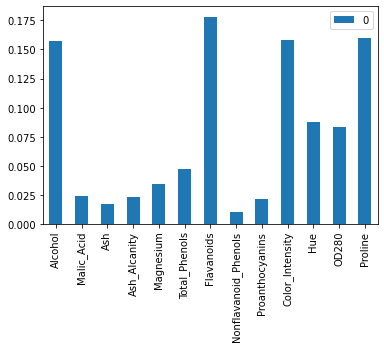

In [59]:
pd.DataFrame(rf.feature_importances_,index=X_train.columns).plot.bar();

From the plot we can see that features: Alcohol, Flavanoids,Color_Intensity nad Proline are most important features. Whereas features: Nonflavanoid_Phenols, Ash, Malic_Acid, Proanthocyanins are least important features.

Now let us build two models by first not dropping and then dropping the least important features.

In [60]:
rf1 = RandomForestClassifier(random_state=42)
rf1.fit(xtrain,ytrain)

RandomForestClassifier(random_state=42)

I'm using the values which has been scaled down to fit the model.

In [61]:
train_pred_rf1=rf1.predict(xtrain)
test_pred_rf1=rf1.predict(xtest)
print("Y Train predicted:\n",train_pred_rf1)
print("\nY Test predicted:\n",test_pred_rf1)

Y Train predicted:
 [1 1 1 1 3 3 2 3 1 1 2 2 1 1 3 2 2 2 1 1 2 3 1 3 3 1 1 2 2 1 1 1 1 1 2 3 1
 2 1 2 2 2 2 2 2 2 1 1 3 1 1 3 2 2 3 2 2 2 2 1 2 2 1 1 1 1 1 2 2 2 3 3 1 1
 3 2 2 2 2 3 1 3 1 3 2 3 3 2 1 1 2 2 2 1 1 1 3 2 2 2 3 2 1 2 1 2 3 1 1 2 3
 3 2 2 2 3 3 3 3 2 2 3 2 3 3 1 1 3 1 2 3 3 2 3 2 2 2 3 2 1 3 3]

Y Test predicted:
 [1 3 1 2 2 1 1 2 2 3 2 3 1 3 1 2 2 1 2 1 2 2 1 1 2 2 1 3 2 3 1 3 2 3 3 3]


#### Checking for ACCURACY, CONFUSION MATRIX and CLASSIFICATION REPORT of test and train data:

In [62]:
print("\t\t\t\t*****ACCURACY*****\n")
print("Training accuracy:",accuracy_score(ytrain,train_pred_rf1))
print("Testing accuracy:",accuracy_score(ytest,test_pred_rf1))
print('_'*100)

print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
print("Confustion matrix of train data:\n",confusion_matrix(ytrain,train_pred_rf1))
print("\nConfustion matrix of test data:\n",confusion_matrix(ytest,test_pred_rf1))
print('_'*100)

print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
print("Classification Report of train data:\n\n",classification_report(ytrain,train_pred_rf1))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(ytest,test_pred_rf1))
print('_'*100)

				*****ACCURACY*****

Training accuracy: 1.0
Testing accuracy: 1.0
____________________________________________________________________________________________________

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]

Confustion matrix of test data:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
____________________________________________________________________________________________________

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142

---------------------------------------------------------------------------
Classification Repor

We have 0s in confusion matrix. Let us now do hyper paramter tuning in the model and see if this changes.

In [63]:
rf2 = RandomForestClassifier(max_depth=2,min_samples_split=6,random_state=42)
rf2.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=2, min_samples_split=6, random_state=42)

In [64]:
train_pred_rf2=rf2.predict(xtrain)
test_pred_rf2=rf2.predict(xtest)
print("Y Train predicted:\n",train_pred_rf2)
print("\nY Test predicted:\n",test_pred_rf2)

Y Train predicted:
 [1 1 1 1 3 3 2 3 1 1 2 2 1 1 3 2 2 2 1 1 2 3 1 3 3 1 1 2 2 1 1 1 1 1 2 3 1
 2 1 2 1 2 3 2 2 2 1 1 3 1 1 3 2 2 3 2 2 2 2 1 2 2 1 1 1 1 1 2 2 2 3 3 1 1
 3 2 2 2 2 3 1 3 1 3 2 3 3 2 1 1 2 2 2 1 1 1 3 2 2 2 3 2 1 2 1 2 3 1 1 2 3
 3 2 2 2 3 3 3 3 2 2 3 2 3 3 1 1 3 1 2 3 3 2 3 2 2 2 3 2 1 3 3]

Y Test predicted:
 [1 3 1 2 2 1 1 1 2 3 2 3 1 3 1 2 2 1 2 1 2 2 1 1 2 2 1 3 2 3 1 3 2 3 3 3]


#### Checking for ACCURACY, CONFUSION MATRIX and CLASSIFICATION REPORT of test and train data:

In [65]:
print("\t\t\t\t*****ACCURACY*****\n")
rf2_train_acc=accuracy_score(ytrain,train_pred_rf2)
rf2_test_acc=accuracy_score(ytest,test_pred_rf2)
print("Training accuracy:",accuracy_score(ytrain,train_pred_rf2))
print("Testing accuracy:",accuracy_score(ytest,test_pred_rf2))
print('_'*100)

print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
print("Confustion matrix of train data:\n",confusion_matrix(ytrain,train_pred_rf2))
print("\nConfustion matrix of test data:\n",confusion_matrix(ytest,test_pred_rf2))
print('_'*100)

print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
print("Classification Report of train data:\n\n",classification_report(ytrain,train_pred_rf2))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(ytest,test_pred_rf2))
print('_'*100)

				*****ACCURACY*****

Training accuracy: 0.9859154929577465
Testing accuracy: 0.9722222222222222
____________________________________________________________________________________________________

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[47  0  0]
 [ 1 55  1]
 [ 0  0 38]]

Confustion matrix of test data:
 [[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]
____________________________________________________________________________________________________

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-score   support

           1       0.98      1.00      0.99        47
           2       1.00      0.96      0.98        57
           3       0.97      1.00      0.99        38

    accuracy                           0.99       142
   macro avg       0.98      0.99      0.99       142
weighted avg       0.99      0.99      0.99       142

------------------------------------------------------------------

We can clearly see that after tuning the model we have overcome the problem and model has an accuracy of 98% for training and 97% for test.

Let us see if there is any improvement if we remove the least important feature. I am dropping research.

In [66]:
train_acc.append(rf2_train_acc)
test_acc.append(rf2_test_acc)

In [67]:
x1=df2.drop(columns=['Nonflavanoid_Phenols', 'Ash', 'Malic_Acid', 'Proanthocyanins'],axis=1)
y1=df2.iloc[:,-1]

In [68]:
x1.head()

,Alcohol,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,15.6,127,2.80,3.06,5.64,1.04,3.92,1065,1
1,13.20,11.2,100,2.65,2.76,4.38,1.05,3.40,1050,1
2,13.16,18.6,101,2.80,3.24,5.68,1.03,3.17,1185,1
3,14.37,16.8,113,3.85,3.49,7.80,0.86,3.45,1480,1
4,13.24,21.0,118,2.80,2.69,4.32,1.04,2.93,735,1


In [69]:
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: Customer_Segment, dtype: category
Categories (3, int64): [1, 2, 3]

In [70]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y1,test_size=0.2,random_state=28,stratify=y1)

In [71]:
print("Shape of train data:")
print("\nShape of X train:",xtrain1.shape)
print("Shape of Y train:",ytrain1.shape)
print("\nShape of test data:")
print("\nShape of X test:",xtest1.shape)
print("Shape of Y test:",ytest1.shape)

Shape of train data:

Shape of X train: (142, 10)
Shape of Y train: (142,)

Shape of test data:

Shape of X test: (36, 10)
Shape of Y test: (36,)


In [72]:
scaler=MinMaxScaler()
xtrain1=scaler.fit_transform(xtrain1)
xtest1=scaler.transform(xtest1)

In [73]:
rf3 = RandomForestClassifier(random_state=42)
rf3.fit(xtrain1,ytrain1)

RandomForestClassifier(random_state=42)

In [74]:
train_pred_rf3=rf3.predict(xtrain1)
test_pred_rf3=rf3.predict(xtest1)
print("Y Train predicted:\n",train_pred_rf3)
print("\nY Test predicted:\n",test_pred_rf3)

Y Train predicted:
 [2 1 1 1 1 1 2 3 1 3 2 1 2 1 3 2 1 1 2 3 3 2 1 3 2 1 2 2 3 3 2 3 2 2 2 2 3
 2 1 1 1 1 2 2 3 1 3 2 3 1 3 2 3 2 3 2 2 3 2 2 2 3 2 1 1 2 2 1 3 3 2 1 1 2
 2 1 2 2 3 2 1 3 1 1 3 1 2 2 2 1 2 1 3 1 3 2 2 1 3 3 2 1 2 3 2 2 2 1 3 2 1
 1 1 1 2 3 1 1 1 2 2 3 1 3 2 3 1 2 1 3 1 3 2 2 1 2 3 2 3 1 2 3]

Y Test predicted:
 [3 1 2 2 2 2 1 3 3 2 1 1 1 1 3 2 3 3 2 1 1 2 1 1 2 2 2 1 3 3 3 2 3 2 2 1]


#### Checking for ACCURACY, CONFUSION MATRIX and CLASSIFICATION REPORT of test and train data:

In [75]:
print("\t\t\t\t*****ACCURACY*****\n")
print("Training accuracy:",accuracy_score(ytrain1,train_pred_rf3))
print("Testing accuracy:",accuracy_score(ytest1,test_pred_rf3))
print('_'*100)

print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
print("Confustion matrix of train data:\n",confusion_matrix(ytrain1,train_pred_rf3))
print("\nConfustion matrix of test data:\n",confusion_matrix(ytest1,test_pred_rf3))
print('_'*100)

print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
print("Classification Report of train data:\n\n",classification_report(ytrain1,train_pred_rf3))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(ytest1,test_pred_rf3))
print('_'*100)

				*****ACCURACY*****

Training accuracy: 1.0
Testing accuracy: 1.0
____________________________________________________________________________________________________

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]

Confustion matrix of test data:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
____________________________________________________________________________________________________

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142

---------------------------------------------------------------------------
Classification Repor

Dropping feature research doesn't seem to make any improvement in the model. Now to this model I'll do hyper parameter tuning to find if after dropping research and doing tuning my model performs better or worse than not dropping research and tuning.

In [76]:
rf4 = RandomForestClassifier(max_depth=2,min_samples_split=10,random_state=42)
rf4.fit(xtrain1,ytrain1)

RandomForestClassifier(max_depth=2, min_samples_split=10, random_state=42)

In [77]:
train_pred_rf4=rf4.predict(xtrain1)
test_pred_rf4=rf4.predict(xtest1)
print("Y Train predicted:\n",train_pred_rf4)
print("\nY Test predicted:\n",test_pred_rf4)

Y Train predicted:
 [2 1 1 1 1 1 2 3 1 3 2 1 2 1 3 2 1 1 2 3 3 2 1 3 2 1 2 2 3 3 2 3 2 2 2 2 3
 2 1 1 1 1 2 2 3 1 3 2 3 1 3 2 3 2 3 2 2 3 2 2 2 3 2 1 1 2 2 1 3 3 2 1 1 2
 2 1 2 2 3 2 1 3 1 1 3 1 2 2 2 1 2 1 3 1 3 2 2 1 3 3 2 1 2 3 2 2 2 1 3 2 1
 1 1 1 2 3 1 1 1 2 2 3 1 3 2 3 1 2 1 3 1 3 2 2 1 2 3 2 3 1 2 3]

Y Test predicted:
 [3 1 2 2 2 2 1 3 3 2 1 1 1 1 3 2 3 3 2 1 1 2 1 1 2 2 2 1 3 3 3 2 3 2 2 1]


#### Checking for ACCURACY, CONFUSION MATRIX and CLASSIFICATION REPORT of test and train data:

In [78]:
print("\t\t\t\t*****ACCURACY*****\n")
rf4_train_acc=accuracy_score(ytrain1,train_pred_rf4)
rf4_test_acc=accuracy_score(ytest1,test_pred_rf4)
print("Training accuracy:",accuracy_score(ytrain1,train_pred_rf4))
print("Testing accuracy:",accuracy_score(ytest1,test_pred_rf4))
print('_'*100)

print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
print("Confustion matrix of train data:\n",confusion_matrix(ytrain1,train_pred_rf4))
print("\nConfustion matrix of test data:\n",confusion_matrix(ytest1,test_pred_rf4))
print('_'*100)

print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
print("Classification Report of train data:\n\n",classification_report(ytrain1,train_pred_rf4))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(ytest1,test_pred_rf4))
print('_'*100)

				*****ACCURACY*****

Training accuracy: 1.0
Testing accuracy: 1.0
____________________________________________________________________________________________________

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]

Confustion matrix of test data:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
____________________________________________________________________________________________________

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142

---------------------------------------------------------------------------
Classification Repor

The model is having an accuracy of 100% on training and testing.

In [79]:
train_acc.append(rf4_train_acc)
test_acc.append(rf4_test_acc)

In [80]:
rf5 = RandomForestClassifier(max_depth=2,min_samples_split=12,random_state=42)
rf5.fit(xtrain1,ytrain1)

RandomForestClassifier(max_depth=2, min_samples_split=12, random_state=42)

In [81]:
train_pred_rf5=rf5.predict(xtrain1)
test_pred_rf5=rf5.predict(xtest1)
print("Y Train predicted:\n",train_pred_rf5)
print("\nY Test predicted:\n",test_pred_rf5)

Y Train predicted:
 [2 1 1 1 1 1 2 3 1 3 2 1 2 1 3 2 1 1 2 3 3 2 1 3 2 1 2 2 3 3 2 3 2 2 2 2 3
 2 1 1 1 1 2 2 3 1 3 2 3 1 3 2 3 2 3 2 2 3 2 2 2 3 2 1 1 2 2 1 3 3 2 1 1 2
 2 1 2 2 3 2 1 3 1 1 3 1 2 2 2 1 2 1 3 1 3 2 2 1 3 3 2 1 2 3 2 2 2 1 3 2 1
 1 1 1 2 3 1 1 1 2 2 3 1 3 2 3 1 2 1 3 1 3 2 2 1 2 3 2 3 1 2 3]

Y Test predicted:
 [3 1 2 2 2 2 1 3 3 2 1 1 1 1 3 2 3 3 2 1 1 2 1 1 2 2 2 1 3 3 3 2 3 2 2 1]


#### Checking for ACCURACY, CONFUSION MATRIX and CLASSIFICATION REPORT of test and train data:¶

In [82]:
print("\t\t\t\t*****ACCURACY*****\n")
rf5_train_acc=accuracy_score(ytrain1,train_pred_rf5)
rf5_test_acc=accuracy_score(ytest1,test_pred_rf5)
print("Training accuracy:",accuracy_score(ytrain1,train_pred_rf5))
print("Testing accuracy:",accuracy_score(ytest1,test_pred_rf5))
print('_'*100)

print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
print("Confustion matrix of train data:\n",confusion_matrix(ytrain1,train_pred_rf5))
print("\nConfustion matrix of test data:\n",confusion_matrix(ytest1,test_pred_rf5))
print('_'*100)

print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
print("Classification Report of train data:\n\n",classification_report(ytrain1,train_pred_rf5))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(ytest1,test_pred_rf5))
print('_'*100)

				*****ACCURACY*****

Training accuracy: 1.0
Testing accuracy: 1.0
____________________________________________________________________________________________________

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]

Confustion matrix of test data:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
____________________________________________________________________________________________________

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142

---------------------------------------------------------------------------
Classification Repor

I changed the parameters slightly for RF to check how RF performs. The training accuracy is and testing accuracy is at 100%.

In [83]:
train_acc.append(rf5_train_acc)
test_acc.append(rf5_test_acc)

#### BAGGING CLASSIFIER:

1. Bagging Classifier is a type of ensemble technique which uses both Row sampling and Feature Sampling. 
2. Random forest also uses both Row sampling and Feature Sampling.
3. Decision tree uses only Row sampling.

The main difference between bagging classifier and decision tree is in deicion tree only row sampling is done, whereas in bagging classifier both row and feature sampling are done.

The main difference between bagging classifier and random forest is that in random forest n number of decision trees are constructedin total with both row and feature sampling techniques, whereas in bagging classifier only one tree is constructed in total with both row and feature sampling.

In [84]:
bc= BaggingClassifier(random_state=42)
bc.fit(xtrain,ytrain)

BaggingClassifier(random_state=42)

In [85]:
train_pred_bc=rf4.predict(xtrain1)
test_pred_bc=rf4.predict(xtest1)
print("Y Train predicted:\n",train_pred_bc)
print("\nY Test predicted:\n",test_pred_bc)

Y Train predicted:
 [2 1 1 1 1 1 2 3 1 3 2 1 2 1 3 2 1 1 2 3 3 2 1 3 2 1 2 2 3 3 2 3 2 2 2 2 3
 2 1 1 1 1 2 2 3 1 3 2 3 1 3 2 3 2 3 2 2 3 2 2 2 3 2 1 1 2 2 1 3 3 2 1 1 2
 2 1 2 2 3 2 1 3 1 1 3 1 2 2 2 1 2 1 3 1 3 2 2 1 3 3 2 1 2 3 2 2 2 1 3 2 1
 1 1 1 2 3 1 1 1 2 2 3 1 3 2 3 1 2 1 3 1 3 2 2 1 2 3 2 3 1 2 3]

Y Test predicted:
 [3 1 2 2 2 2 1 3 3 2 1 1 1 1 3 2 3 3 2 1 1 2 1 1 2 2 2 1 3 3 3 2 3 2 2 1]


#### Checking for ACCURACY, CONFUSION MATRIX and CLASSIFICATION REPORT of test and train data:

In [86]:
print("\t\t\t\t*****ACCURACY*****\n")
bc_train_acc=accuracy_score(ytrain,train_pred_bc)
bc_test_acc=accuracy_score(ytest,test_pred_bc)
print("Training accuracy:",accuracy_score(ytrain,train_pred_bc))
print("Testing accuracy:",accuracy_score(ytest,test_pred_bc))
print('_'*100)

print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
print("Confustion matrix of train data:\n",confusion_matrix(ytrain,train_pred_bc))
print("\nConfustion matrix of test data:\n",confusion_matrix(ytest,test_pred_bc))
print('_'*100)

print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
print("Classification Report of train data:\n\n",classification_report(ytrain,train_pred_bc))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(ytest,test_pred_bc))
print('_'*100)

				*****ACCURACY*****

Training accuracy: 0.3873239436619718
Testing accuracy: 0.3611111111111111
____________________________________________________________________________________________________

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[20 17 10]
 [16 24 17]
 [11 16 11]]

Confustion matrix of test data:
 [[5 3 4]
 [2 7 5]
 [5 4 1]]
____________________________________________________________________________________________________

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-score   support

           1       0.43      0.43      0.43        47
           2       0.42      0.42      0.42        57
           3       0.29      0.29      0.29        38

    accuracy                           0.39       142
   macro avg       0.38      0.38      0.38       142
weighted avg       0.39      0.39      0.39       142

---------------------------------------------------------------------------

The model is performing with training accuracy of 38% and testing accuracy of 36%.

In [87]:
train_acc.append(bc_train_acc)
test_acc.append(bc_test_acc)

#### K NEAREST NEIGHBORS (KNN):

In [88]:
knn = KNeighborsClassifier()

In [89]:
accuracy_train=[]
accuracy_test=[]
for i in range(1,14,2):
    print("K =",i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train_pred=knn.predict(xtrain)
    test_pred=knn.predict(xtest)
    print("Accuracy of Train data for K =",i,"is",accuracy_score(ytrain,train_pred))
    print("Accuracy of Test data for K =",i,"is",accuracy_score(ytest,test_pred))
    accuracy_train.append(accuracy_score(ytrain,train_pred))
    accuracy_test.append(accuracy_score(ytest,test_pred))

K = 1
Accuracy of Train data for K = 1 is 1.0
Accuracy of Test data for K = 1 is 0.9722222222222222
K = 3
Accuracy of Train data for K = 3 is 0.9647887323943662
Accuracy of Test data for K = 3 is 0.9722222222222222
K = 5
Accuracy of Train data for K = 5 is 0.971830985915493
Accuracy of Test data for K = 5 is 1.0
K = 7
Accuracy of Train data for K = 7 is 0.971830985915493
Accuracy of Test data for K = 7 is 1.0
K = 9
Accuracy of Train data for K = 9 is 0.9647887323943662
Accuracy of Test data for K = 9 is 0.9722222222222222
K = 11
Accuracy of Train data for K = 11 is 0.9647887323943662
Accuracy of Test data for K = 11 is 0.9722222222222222
K = 13
Accuracy of Train data for K = 13 is 0.9647887323943662
Accuracy of Test data for K = 13 is 0.9722222222222222


In [90]:
k=[]
for i in range(1,14,2):
    k.append(i)
accuracy=pd.DataFrame(columns=['K','Train','Test'])
accuracy['K']=k
accuracy['Train']=accuracy_train
accuracy['Test']=accuracy_test
accuracy

,K,Train,Test
0,1,1.000000,0.972222
1,3,0.964789,0.972222
2,5,0.971831,1.000000
3,7,0.971831,1.000000
4,9,0.964789,0.972222
5,11,0.964789,0.972222
6,13,0.964789,0.972222


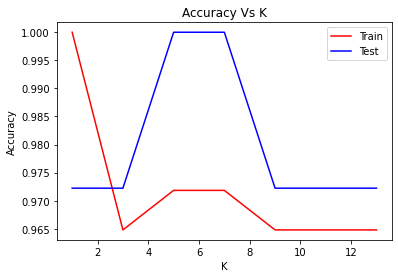

In [91]:
plt.plot(k, accuracy['Train'],color='red',label='Train')
plt.plot(k, accuracy['Test'],color='blue',label='Test')
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.legend()
plt.title("Accuracy Vs K")
plt.show()

#%matplotlib qt

From the plot, the optimum k value comes around 3. Let us build KNN model with k=3.

In [92]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [93]:
train_pred_knn3=knn3.predict(xtrain)
test_pred_knn3=knn3.predict(xtest)
print("For K=3")
print("Y Train predicted:\n",train_pred_knn3)
print("\nY Test predicted:\n",test_pred_knn3)

For K=3
Y Train predicted:
 [1 1 1 1 3 3 2 3 1 1 2 2 1 1 3 2 2 2 1 1 1 3 1 3 3 1 1 2 2 1 1 1 1 1 2 3 1
 2 1 2 1 2 3 2 2 2 1 1 3 1 1 3 2 2 3 2 2 2 2 1 2 2 1 1 1 1 1 2 2 3 3 3 1 1
 3 2 2 2 2 3 1 3 1 3 2 3 3 2 1 1 2 2 2 1 1 1 3 2 2 2 3 2 1 2 1 2 3 1 1 2 3
 3 2 1 2 3 3 3 3 2 2 3 2 3 3 1 1 3 1 2 3 3 2 3 2 2 2 3 2 1 3 3]

Y Test predicted:
 [1 3 1 1 2 1 1 2 2 3 2 3 1 3 1 2 2 1 2 1 2 2 1 1 2 2 1 3 2 3 1 3 2 3 3 3]


#### Checking for ACCURACY, CONFUSION MATRIX and CLASSIFICATION REPORT of test and train data:

In [94]:
print("FOR K=3\n")
print("\t\t\t\t*****ACCURACY*****\n")
knn3_train_acc=accuracy_score(ytrain,train_pred_knn3)
knn3_test_acc=accuracy_score(ytest,test_pred_knn3)
print("Training accuracy:",accuracy_score(ytrain,train_pred_knn3))
print("Testing accuracy:",accuracy_score(ytest,test_pred_knn3))
print('_'*100)

print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
print("Confustion matrix of train data:\n",confusion_matrix(ytrain,train_pred_knn3))
print("\nConfustion matrix of test data:\n",confusion_matrix(ytest,test_pred_knn3))
print('_'*100)

print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
print("Classification Report of train data:\n\n",classification_report(ytrain,train_pred_knn3))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(ytest,test_pred_knn3))
print('_'*100)

FOR K=3

				*****ACCURACY*****

Training accuracy: 0.9647887323943662
Testing accuracy: 0.9722222222222222
____________________________________________________________________________________________________

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[47  0  0]
 [ 3 52  2]
 [ 0  0 38]]

Confustion matrix of test data:
 [[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]
____________________________________________________________________________________________________

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-score   support

           1       0.94      1.00      0.97        47
           2       1.00      0.91      0.95        57
           3       0.95      1.00      0.97        38

    accuracy                           0.96       142
   macro avg       0.96      0.97      0.97       142
weighted avg       0.97      0.96      0.96       142

---------------------------------------------------------

The training accuracy is 96% whereas the testing accuracy is 97%.

Therefore the optimum K value is 3.

In [95]:
train_acc.append(knn3_train_acc)
test_acc.append(knn3_test_acc)

## Question 5: Build a Naive Bayes Classifier and comment about its accuracy.

#### NAIVE BAYES:

In [96]:
gnb = GaussianNB()
gnb.fit(xtrain,ytrain)

GaussianNB()

In [97]:
train_pred_gnb=gnb.predict(xtrain)
test_pred_gnb=gnb.predict(xtest)
print("Y Train predicted:\n",train_pred_gnb)
print("\nY Test predicted:\n",test_pred_gnb)

Y Train predicted:
 [1 1 1 1 3 3 2 3 1 1 2 2 1 1 3 2 2 2 1 1 2 3 1 3 3 1 1 2 2 1 1 1 1 1 2 3 2
 2 1 2 2 2 3 2 2 2 1 1 3 1 1 3 2 2 3 2 2 2 2 1 2 2 1 1 1 1 1 2 2 2 3 3 1 1
 3 2 2 2 2 3 1 3 1 3 2 3 3 2 1 1 2 2 2 1 1 1 3 2 2 3 3 2 1 2 1 2 3 1 1 2 3
 3 2 2 2 3 3 3 3 2 2 3 2 3 3 1 1 3 1 2 3 3 2 3 2 2 2 3 2 1 3 3]

Y Test predicted:
 [1 3 1 2 2 1 1 1 2 3 2 3 1 3 1 2 2 1 2 1 2 2 1 1 2 2 1 3 2 3 1 3 2 3 3 3]


#### Checking for ACCURACY, CONFUSION MATRIX and CLASSIFICATION REPORT of test and train data:

In [98]:
print("\t\t\t\t*****ACCURACY*****\n")
gnb_train_acc=accuracy_score(ytrain,train_pred_gnb)
gnb_test_acc=accuracy_score(ytest,test_pred_gnb)
print("Accuracy of Train data:",accuracy_score(ytrain,train_pred_gnb))
print("\nAccuracy of Test data:",accuracy_score(ytest,test_pred_gnb))
print('-'*75)
print("\nConfusion matrix of Train data:\n",confusion_matrix(ytrain,train_pred_gnb))
print("\nConfusion matrix of Test data:\n",confusion_matrix(ytest,test_pred_gnb))
print('-'*75)
print("\nClassification Report of Train data:\n",classification_report(ytrain,train_pred_gnb))
print("\nClassification Report of Test data:\n",classification_report(ytest,test_pred_gnb))

				*****ACCURACY*****

Accuracy of Train data: 0.9788732394366197

Accuracy of Test data: 0.9722222222222222
---------------------------------------------------------------------------

Confusion matrix of Train data:
 [[46  1  0]
 [ 0 55  2]
 [ 0  0 38]]

Confusion matrix of Test data:
 [[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]
---------------------------------------------------------------------------

Classification Report of Train data:
               precision    recall  f1-score   support

           1       1.00      0.98      0.99        47
           2       0.98      0.96      0.97        57
           3       0.95      1.00      0.97        38

    accuracy                           0.98       142
   macro avg       0.98      0.98      0.98       142
weighted avg       0.98      0.98      0.98       142


Classification Report of Test data:
               precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0

The model is showing a training accuracy of 97% and testing accuracy of 97%.

In [99]:
train_acc.append(gnb_train_acc)
test_acc.append(gnb_test_acc)

## Question 4: Build a SVM Classifier and tune the hyperparameters to get the optimum model.

#### SUPPORT VECTOR MACHINES (SVM):

In [100]:
svm=SVC(random_state=42)
svm.fit(xtrain,ytrain)

SVC(random_state=42)

In [101]:
train_pred_svm=svm.predict(xtrain)
test_pred_svm=svm.predict(xtest)
print("Y Train predicted:\n",train_pred_svm)
print("\nY Test predicted:\n",test_pred_svm)

Y Train predicted:
 [1 1 1 1 3 3 2 3 1 1 2 2 1 1 3 2 2 2 1 1 2 3 1 3 3 1 1 2 2 1 1 1 1 1 2 3 1
 2 1 2 2 2 2 2 2 2 1 1 3 1 1 3 2 2 3 2 2 2 2 1 2 2 1 1 1 1 1 2 2 2 3 3 1 1
 3 2 2 2 2 3 1 3 1 3 2 3 3 2 1 1 2 2 2 1 1 1 3 2 2 2 3 2 1 2 1 2 3 1 1 2 3
 3 2 2 2 3 3 3 3 2 2 3 2 3 3 1 1 3 1 2 3 3 2 3 2 2 2 3 2 1 3 3]

Y Test predicted:
 [1 3 1 2 2 1 1 2 2 3 2 3 1 3 1 2 2 1 2 1 2 2 1 1 2 2 1 3 2 3 1 3 2 3 3 3]


#### Checking for ACCURACY, CONFUSION MATRIX and CLASSIFICATION REPORT of test and train data:

In [102]:
print("\t\t\t\t*****ACCURACY*****\n")
svm_train_acc=accuracy_score(ytrain,train_pred_svm)
svm_test_acc=accuracy_score(ytest,test_pred_svm)
print("Accuracy of Train data:",accuracy_score(ytrain,train_pred_svm))
print("\nAccuracy of Test data:",accuracy_score(ytest,test_pred_svm))
print('-'*75)
print("\nConfusion matrix of Train data:\n",confusion_matrix(ytrain,train_pred_svm))
print("\nConfusion matrix of Test data:\n",confusion_matrix(ytest,test_pred_svm))
print('-'*75)
print("\nClassification Report of Train data:\n",classification_report(ytrain,train_pred_svm))
print("\nClassification Report of Test data:\n",classification_report(ytest,test_pred_svm))

				*****ACCURACY*****

Accuracy of Train data: 1.0

Accuracy of Test data: 1.0
---------------------------------------------------------------------------

Confusion matrix of Train data:
 [[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]

Confusion matrix of Test data:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
---------------------------------------------------------------------------

Classification Report of Train data:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142


Classification Report of Test data:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
      

Model accuracy is 100% for both test and train.

In [103]:
train_acc.append(svm_train_acc)
test_acc.append(svm_test_acc)

#### Fine tuning SVM:

In [104]:
params_svm = { 'C': [0.1,1,10,100,1000],
               'gamma':[1,0.1,0.01,0.001,0.0001],
               'kernel':['rbf']
            }
params_svm

{'C': [0.1, 1, 10, 100, 1000],
 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
 'kernel': ['rbf']}

In [105]:
gscv_svm=GridSearchCV(estimator=svm,param_grid=params_svm,cv=5)
gscv_svm.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [106]:
gscv_svm.best_estimator_

SVC(C=1, gamma=1, random_state=42)

In [107]:
svm1=SVC(C=1, gamma=1, random_state=42)
svm1.fit(xtrain,ytrain)

SVC(C=1, gamma=1, random_state=42)

In [108]:
train_pred_svm1=svm1.predict(xtrain)
test_pred_svm1=svm1.predict(xtest)
print("Y Train predicted:\n",train_pred_svm1)
print("\nY Test predicted:\n",test_pred_svm1)

Y Train predicted:
 [1 1 1 1 3 3 2 3 1 1 2 2 1 1 3 2 2 2 1 1 2 3 1 3 3 1 1 2 2 1 1 1 1 1 2 3 1
 2 1 2 2 2 2 2 2 2 1 1 3 1 1 3 2 2 3 2 2 2 2 1 2 2 1 1 1 1 1 2 2 2 3 3 1 1
 3 2 2 2 2 3 1 3 1 3 2 3 3 2 1 1 2 2 2 1 1 1 3 2 2 2 3 2 1 2 1 2 3 1 1 2 3
 3 2 2 2 3 3 3 3 2 2 3 2 3 3 1 1 3 1 2 3 3 2 3 2 2 2 3 2 1 3 3]

Y Test predicted:
 [1 3 1 2 2 1 1 2 2 3 2 3 1 3 1 2 2 1 2 1 2 2 1 1 2 2 1 3 2 3 1 3 2 3 3 3]


#### Checking for ACCURACY, CONFUSION MATRIX and CLASSIFICATION REPORT of test and train data:

In [109]:
print("\t\t\t\t*****ACCURACY*****\n")
svm_train_acc1=accuracy_score(ytrain,train_pred_svm1)
svm_test_acc1=accuracy_score(ytest,test_pred_svm1)
print("Accuracy of Train data:",accuracy_score(ytrain,train_pred_svm1))
print("\nAccuracy of Test data:",accuracy_score(ytest,test_pred_svm1))
print('-'*75)
print("\nConfusion matrix of Train data:\n",confusion_matrix(ytrain,train_pred_svm1))
print("\nConfusion matrix of Test data:\n",confusion_matrix(ytest,test_pred_svm1))
print('-'*75)
print("\nClassification Report of Train data:\n",classification_report(ytrain,train_pred_svm1))
print("\nClassification Report of Test data:\n",classification_report(ytest,test_pred_svm1))

				*****ACCURACY*****

Accuracy of Train data: 1.0

Accuracy of Test data: 1.0
---------------------------------------------------------------------------

Confusion matrix of Train data:
 [[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]

Confusion matrix of Test data:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
---------------------------------------------------------------------------

Classification Report of Train data:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142


Classification Report of Test data:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
      

## Question 6: Compare all of the models and justify your choice about the optimum model.

#### Comparing all of the models based on their accuracy:

#### Cross-Validation:

In [110]:
crossval_lr=cross_val_score(lom,xtrain,ytrain,cv=5)
print("Cross validation score of LOGISTIC REGRESSION:",crossval_lr)

Cross validation score of LOGISTIC REGRESSION: [1.         0.93103448 1.         1.         1.        ]


In [111]:
crossval_dt=cross_val_score(dt1,xtrain,ytrain,cv=5)
print("Cross validation score of DECISION TREE:",crossval_dt)

Cross validation score of DECISION TREE: [0.82758621 0.86206897 0.92857143 0.89285714 0.96428571]


In [112]:
crossval_rf1=cross_val_score(rf2,xtrain,ytrain,cv=5)
print("Cross validation score of RANDOM FOREST before dropping 'Research':",crossval_rf1)

Cross validation score of RANDOM FOREST before dropping 'Research': [1.         0.93103448 1.         0.96428571 1.        ]


In [113]:
crossval_rf2=cross_val_score(rf4,xtrain1,ytrain1,cv=5)
print("Cross validation score of RANDOM FOREST after dropping 'Research':",crossval_rf2)

Cross validation score of RANDOM FOREST after dropping 'Research': [1. 1. 1. 1. 1.]


In [114]:
crossval_rf3=cross_val_score(rf5,xtrain1,ytrain1,cv=5)
print("Cross validation score of RANDOM FOREST after dropping 'Research':",crossval_rf2)

Cross validation score of RANDOM FOREST after dropping 'Research': [1. 1. 1. 1. 1.]


In [115]:
crossval_bc=cross_val_score(bc,xtrain,ytrain,cv=5)
print("Cross validation score of BAGGING CLASSIFIER':",crossval_bc)

Cross validation score of BAGGING CLASSIFIER': [0.82758621 0.93103448 1.         0.96428571 0.96428571]


In [116]:
crossval_knn3=cross_val_score(knn3,xtrain,ytrain,cv=5)
print("Cross validation score of KNN for K=3':",crossval_knn3)

Cross validation score of KNN for K=3': [0.96551724 0.89655172 0.96428571 0.96428571 0.96428571]


In [117]:
crossval_gnb=cross_val_score(gnb,xtrain,ytrain,cv=5)
print("Cross validation score of GAUSSIAN NAIVE BAYES':",crossval_gnb)

Cross validation score of GAUSSIAN NAIVE BAYES': [1.         0.93103448 1.         0.92857143 1.        ]


In [118]:
crossval_svm=cross_val_score(svm,xtrain,ytrain,cv=5)
print("Cross validation score of SUPPORT VECTOR MACHINE':",crossval_svm)

Cross validation score of SUPPORT VECTOR MACHINE': [1.         0.93103448 1.         1.         1.        ]


In [119]:
crossval=pd.DataFrame({'Logistic Regression':crossval_lr,
                       'Decision Tree 1':crossval_dt,
                       'Random Forest 2':crossval_rf1,
                       'Random Forest 4':crossval_rf2,
                       'Random Forest 5':crossval_rf3,
                       'Bagging Classifier':crossval_bc,
                       'K Nearest Neighbor (k=3)':crossval_knn3,
                       'Naive Bayes':crossval_gnb,
                       'Support Vector Machine':crossval_svm})
crossval

,Logistic Regression,Decision Tree 1,Random Forest 2,Random Forest 4,Random Forest 5,Bagging Classifier,K Nearest Neighbor (k=3),Naive Bayes,Support Vector Machine
0,1.000000,0.827586,1.000000,1.0,1.0,0.827586,0.965517,1.000000,1.000000
1,0.931034,0.862069,0.931034,1.0,1.0,0.931034,0.896552,0.931034,0.931034
2,1.000000,0.928571,1.000000,1.0,1.0,1.000000,0.964286,1.000000,1.000000
3,1.000000,0.892857,0.964286,1.0,1.0,0.964286,0.964286,0.928571,1.000000
4,1.000000,0.964286,1.000000,1.0,1.0,0.964286,0.964286,1.000000,1.000000


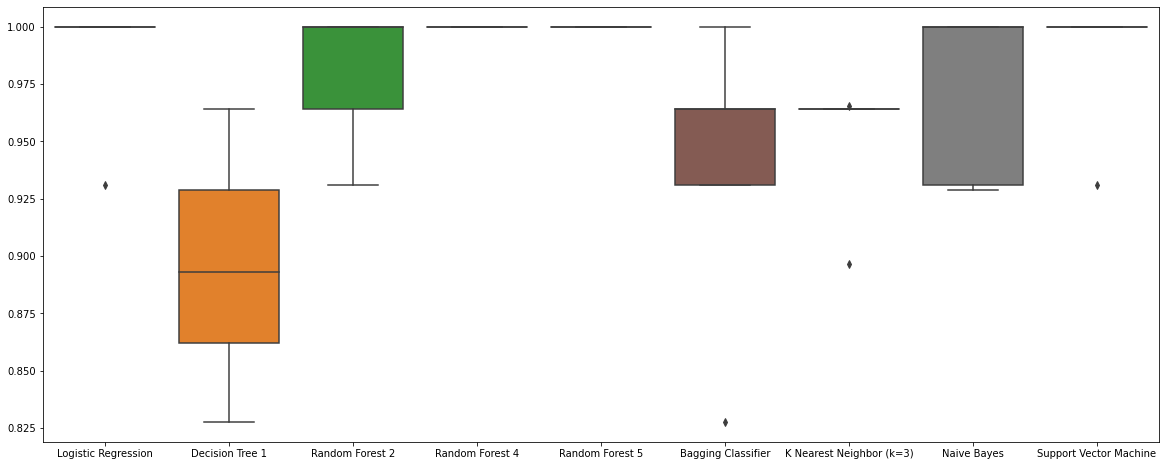

In [120]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data=crossval)
plt.show()

In [121]:
summary = pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])
models = ['Logistic Regression','Decision Tree 1','Random Forest 2','Random Forest 4','Random Forest 5','Bagging Classifier','K Nearest Neighbor (k=3)','Naive Bayes','Support Vector Machine (SVM)']

In [122]:
summary['Model']=models

In [123]:
train_acc=[lr_train_acc,dt1_train_acc,rf2_train_acc,rf4_train_acc,rf5_train_acc,bc_train_acc,knn3_train_acc,gnb_train_acc,svm_train_acc]
test_acc=[lr_test_acc,dt1_test_acc,rf2_test_acc,rf4_test_acc,rf5_test_acc,bc_test_acc,knn3_test_acc,gnb_test_acc,svm_test_acc]
summary['Train Accuracy']=train_acc
summary['Test Accuracy']=test_acc

In [124]:
summary

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.985915,1.000000
1,Decision Tree 1,0.929577,0.861111
2,Random Forest 2,0.985915,0.972222
3,Random Forest 4,1.000000,1.000000
4,Random Forest 5,1.000000,1.000000
5,Bagging Classifier,0.387324,0.361111
6,K Nearest Neighbor (k=3),0.964789,0.972222
7,Naive Bayes,0.978873,0.972222
8,Support Vector Machine (SVM),1.000000,1.000000


The optimum model I choose is KNN(K=3) which is not fine tuned. So, I'll do GSCV in KNN. But, Random Forest 2(which was fine tuned) has low variance in the cross validation and the next optimum model is Decision Tree 1(which is also fine tuned). The models which show maximum accuracy without fine tuning are KNN with k=3 and Naive Bayes.

### Grid Search CV:

In [125]:
params_knn = {
                'n_neighbors':[3,5,7,9,11,13],
                'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                'leaf_size':[10,20,30]    
            }
params_knn

{'n_neighbors': [3, 5, 7, 9, 11, 13],
 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'leaf_size': [10, 20, 30]}

In [126]:
gscv_knn=GridSearchCV(estimator=knn,param_grid=params_knn,cv=10)

In [127]:
gscv_knn.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=13),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [128]:
gscv_knn.best_estimator_

KNeighborsClassifier(leaf_size=10, n_neighbors=13)

In [129]:
knn_new = KNeighborsClassifier(leaf_size=10, n_neighbors=13)
knn_new.fit(xtrain,ytrain)

KNeighborsClassifier(leaf_size=10, n_neighbors=13)

In [130]:
train_pred_knn_new=knn_new.predict(xtrain)
test_pred_knn_new=knn_new.predict(xtest)
print("Y Train predicted:\n",train_pred_knn_new)
print("\nY Test predicted:\n",test_pred_knn_new)

Y Train predicted:
 [1 1 1 1 3 3 2 3 1 1 2 2 1 1 3 2 2 2 1 1 2 3 1 3 3 1 1 2 2 1 1 1 1 1 2 3 1
 2 1 2 1 2 3 2 2 2 1 1 3 1 1 3 2 2 3 2 3 2 2 1 2 2 1 1 1 1 1 2 2 3 3 3 1 1
 3 2 2 2 2 3 1 3 1 3 1 3 3 2 1 1 2 2 2 1 1 1 3 2 2 2 3 2 1 2 1 2 3 1 1 2 3
 3 2 2 2 3 3 3 3 2 2 3 2 3 3 1 1 3 1 2 3 3 2 3 2 2 2 3 2 1 3 3]

Y Test predicted:
 [1 3 1 2 2 1 1 1 2 3 2 3 1 3 1 2 2 1 2 1 2 2 1 1 2 2 1 3 2 3 1 3 2 3 3 3]


In [131]:
print("\t\t\t\t*****ACCURACY*****\n")
print("Training accuracy:",accuracy_score(ytrain,train_pred_knn_new))
print("Testing accuracy:",accuracy_score(ytest,test_pred_knn_new))
print('_'*100)

print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
print("Confustion matrix of train data:\n",confusion_matrix(ytrain,train_pred_knn_new))
print("\nConfustion matrix of test data:\n",confusion_matrix(ytest,test_pred_knn_new))
print('_'*100)

print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
print("Classification Report of train data:\n\n",classification_report(ytrain,train_pred_knn_new))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(ytest,test_pred_knn_new))
print('_'*100)

				*****ACCURACY*****

Training accuracy: 0.9647887323943662
Testing accuracy: 0.9722222222222222
____________________________________________________________________________________________________

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[47  0  0]
 [ 2 52  3]
 [ 0  0 38]]

Confustion matrix of test data:
 [[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]
____________________________________________________________________________________________________

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-score   support

           1       0.96      1.00      0.98        47
           2       1.00      0.91      0.95        57
           3       0.93      1.00      0.96        38

    accuracy                           0.96       142
   macro avg       0.96      0.97      0.97       142
weighted avg       0.97      0.96      0.96       142

------------------------------------------------------------------

The Training accuracy is 96% and testing accuracy is 97%. This is the same accuracy we got before fine tuning. Since this is very high we cannot further increase it by fine tuning.

In [132]:
crossval_knn_new=cross_val_score(knn_new,xtrain,ytrain,cv=5)
print("Cross validation score of KNN for K=3':",crossval_knn_new)

Cross validation score of KNN for K=3': [1.         0.93103448 0.96428571 0.96428571 1.        ]


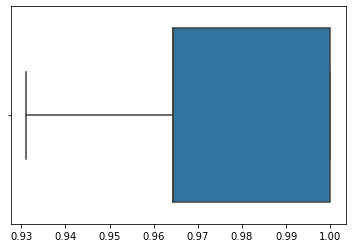

In [133]:
sns.boxplot(crossval_knn_new);

### Boosting: 

In [134]:
adaboost= AdaBoostClassifier()
adaboost.fit(xtrain,ytrain)

AdaBoostClassifier()

In [135]:
xtrain_pred= adaboost.predict(xtrain)
xtest_pred= adaboost.predict(xtest)

In [136]:
print('train data\n',confusion_matrix(ytrain,xtrain_pred))
print('test data\n',confusion_matrix(ytest,xtest_pred))

train data
 [[45  2  0]
 [ 8 49  0]
 [ 0  0 38]]
test data
 [[10  2  0]
 [ 3 11  0]
 [ 0  3  7]]


In [137]:
print('train data\n',classification_report(ytrain,xtrain_pred))
print('test data\n',classification_report(ytest,xtest_pred))

train data
               precision    recall  f1-score   support

           1       0.85      0.96      0.90        47
           2       0.96      0.86      0.91        57
           3       1.00      1.00      1.00        38

    accuracy                           0.93       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.93      0.93      0.93       142

test data
               precision    recall  f1-score   support

           1       0.77      0.83      0.80        12
           2       0.69      0.79      0.73        14
           3       1.00      0.70      0.82        10

    accuracy                           0.78        36
   macro avg       0.82      0.77      0.79        36
weighted avg       0.80      0.78      0.78        36



## Question 2: What are the optimum number of principal components in PCA?

### Principle Component Analysis (PCA):

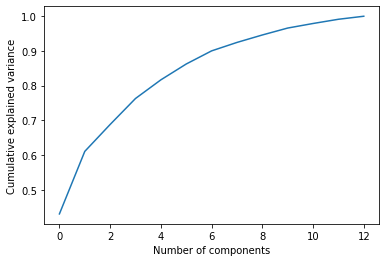

In [138]:
pca = PCA()

pca.fit(xtrain)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

## Question 3: Build a KNN classifier considering optimal number of principal components and value of K and state its score.

In [139]:
p_xtrain=pca.fit_transform(xtrain)
p_xtest=pca.transform(xtest)

In [140]:
knn_pca=KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(p_xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [141]:
train_pred_knn_pca=knn_pca.predict(p_xtrain)
test_pred_knn_pca=knn_pca.predict(p_xtest)
print("For K=3")
print("Y Train predicted:\n",train_pred_knn_pca)
print("\nY Test predicted:\n",test_pred_knn_pca)

For K=3
Y Train predicted:
 [1 1 1 1 3 3 2 3 1 1 2 2 1 1 3 2 2 2 1 1 1 3 1 3 3 1 1 2 2 1 1 1 1 1 2 3 1
 2 1 2 1 2 3 2 2 2 1 1 3 1 1 3 2 2 3 2 2 2 2 1 2 2 1 1 1 1 1 2 2 3 3 3 1 1
 3 2 2 2 2 3 1 3 1 3 2 3 3 2 1 1 2 2 2 1 1 1 3 2 2 2 3 2 1 2 1 2 3 1 1 2 3
 3 2 1 2 3 3 3 3 2 2 3 2 3 3 1 1 3 1 2 3 3 2 3 2 2 2 3 2 1 3 3]

Y Test predicted:
 [1 3 1 1 2 1 1 2 2 3 2 3 1 3 1 2 2 1 2 1 2 2 1 1 2 2 1 3 2 3 1 3 2 3 3 3]


In [142]:
print("FOR K=3\n")
print("\t\t\t\t*****ACCURACY*****\n")
knn3_train_acc=accuracy_score(ytrain,train_pred_knn_pca)
knn3_test_acc=accuracy_score(ytest,test_pred_knn_pca)
print("Training accuracy:",accuracy_score(ytrain,train_pred_knn_pca))
print("Testing accuracy:",accuracy_score(ytest,test_pred_knn_pca))
print('_'*100)

print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
print("Confustion matrix of train data:\n",confusion_matrix(ytrain,train_pred_knn_pca))
print("\nConfustion matrix of test data:\n",confusion_matrix(ytest,test_pred_knn_pca))
print('_'*100)

print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
print("Classification Report of train data:\n\n",classification_report(ytrain,train_pred_knn_pca))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(ytest,test_pred_knn_pca))
print('_'*100)


FOR K=3

				*****ACCURACY*****

Training accuracy: 0.9647887323943662
Testing accuracy: 0.9722222222222222
____________________________________________________________________________________________________

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[47  0  0]
 [ 3 52  2]
 [ 0  0 38]]

Confustion matrix of test data:
 [[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]
____________________________________________________________________________________________________

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-score   support

           1       0.94      1.00      0.97        47
           2       1.00      0.91      0.95        57
           3       0.95      1.00      0.97        38

    accuracy                           0.96       142
   macro avg       0.96      0.97      0.97       142
weighted avg       0.97      0.96      0.96       142

---------------------------------------------------------

The accuracy of the model is 97% and 100% for training and testing respectively.